In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Online_Cars_Sale_Marketplace.csv')

df.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [130]:
df['SellerName'].value_counts().head(5)

SellerName
EchoPark Automotive Greenville                        36
Autos of Dallas                                       35
EchoPark Automotive Salt Lake City Delivery Center    33
Principle Volvo Cars San Antonio                      25
Mungenast St. Louis Honda                             19
Name: count, dtype: int64

In [132]:
high_mileage_cars = df[df['Mileage'] > 100000]
count_high_mileage_cars = high_mileage_cars.shape[0]

print(f'Number of cars with mileage over 100k: {count_high_mileage_cars}')

Number of cars with mileage over 100k: 202


In [134]:
newer_cars = df[df['Year'] > 2020][['Year', 'Make', 'Model', 'Price']]
print(newer_cars)

      Year    Make                       Model     Price
3     2021   Honda             Accord Sport SE   $28,500
8     2021   Honda   Pilot Touring 8-Passenger   $44,299
17    2021  Subaru           Crosstrek Premium   $25,500
21    2021   Acura                  RDX A-Spec   $37,000
22    2021   Acura                  RDX A-Spec   $38,000
...    ...     ...                         ...       ...
9350  2021   Honda                   CR-V EX-L   $37,890
9354  2021   Acura                  TLX A-Spec   $45,998
9360  2021    Land            Rover Defender X  $105,991
9364  2021  Subaru  Ascent Limited 7-Passenger   $43,000
9368  2021   Honda           Accord Sport 1.5T   $29,500

[1429 rows x 4 columns]


In [136]:
top_five_makes = df['Make'].value_counts().head(5)
print("Top five car makes:")
print(top_five_makes)

Top five car makes:
Make
BMW              944
Mercedes-Benz    810
Toyota           797
Honda            713
Ford             580
Name: count, dtype: int64


In [138]:
num_listings = df.shape[0]

print(f'The number of listings in the dataset is: {num_listings}')

The number of listings in the dataset is: 9379


In [140]:
count_5_rated_cars = df[df['ConsumerRating'] == 5.0].shape[0]
print(f'Number of cars with a customer rating of 5.0: {count_5_rated_cars}')

Number of cars with a customer rating of 5.0: 336


In [142]:
popular_cars = df.groupby('Make').size().sort_values(ascending=False)

print(popular_cars.head(10))

Make
BMW              944
Mercedes-Benz    810
Toyota           797
Honda            713
Ford             580
Jeep             495
Lexus            484
Audi             424
Chevrolet        416
Subaru           310
dtype: int64


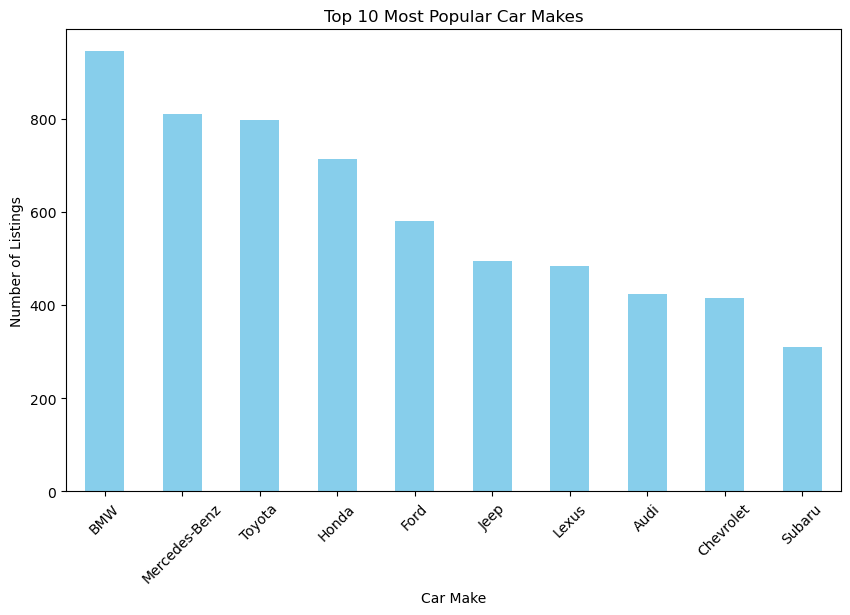

In [144]:
popular_cars.head(10).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Most Popular Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

In [193]:
price_summary = df.groupby('SellerType')['Price'].describe()
price_summary

,count,mean,std,min,25%,50%,75%,max
SellerType,,,,,,,,
Dealer,8463.0,39938.287014,20924.856486,3995.0,28995.00,36250.0,45998.0,449996.0
Private,40.0,36515.075000,23225.065302,2300.0,21998.75,30150.0,47375.0,122222.0


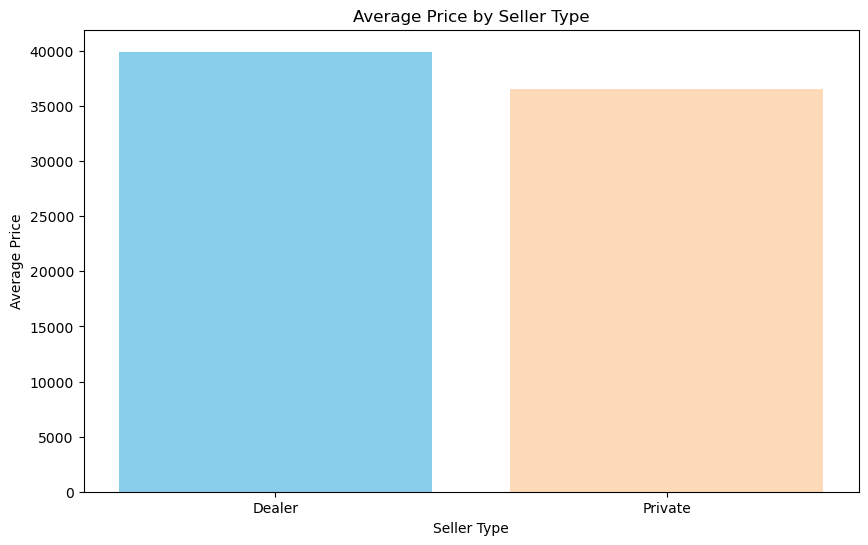

In [157]:
avg_price_by_seller = df.groupby('SellerType')['Price'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.bar(avg_price_by_seller['SellerType'], avg_price_by_seller['Price'], color = ['skyblue', 'peachpuff'])
plt.title('Average Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Price')
plt.show()

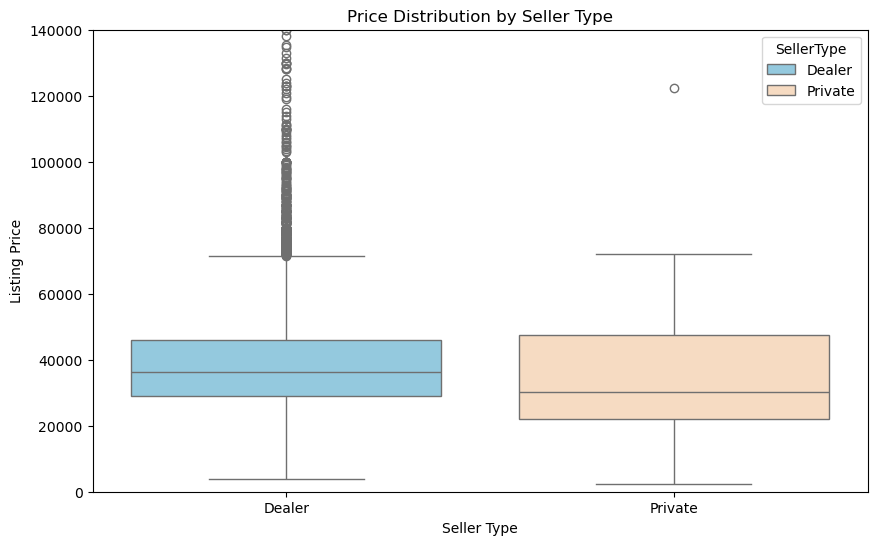

In [191]:
plt.figure(figsize=(10,6))
sns.boxplot(x='SellerType', y='Price', data=df, hue='SellerType', palette={'Dealer':'skyblue', 'Private':'peachpuff'}, legend=True)
plt.title('Price Distribution by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Listing Price')
plt.ylim(0,140000)
plt.show()